# EM Algorithm in Gaussian Mixture Model (GMM)

Gaussian Mixture Model (GMM) $ p(\mathbf{x}) = \sum^{K-1}_{k=0} \pi_k \mathcal{N}(\mathbf{x}|\mu_k, \Sigma_k) $ is decomposed by categorical distribution $ p(\mathbf{z}) $, in which $ p(z_k=1)=\pi_k $ (where $\sum_k \pi_k = 1.0$), and the corresponding Gaussian distribution (normal distribution) with mean $ \mu=(\mu_0, \mu_1, \ldots, \mu_{K-1}) $ and deviation $ \Sigma=(\Sigma_0, \Sigma_1, \ldots, \Sigma_{K-1}) $.<br>
This will be represented by the following graphical model.

![GMM Graphical Model](images/gmm_graphical_model.png?raw=true)

Now we'll find $ \{ \pi_k, \mu_k, \Sigma_k \} (k=0,\ldots,K-1) $ which maximizes the following formula, when $ X=\{\mathbf{x}_0, \ldots, \mathbf{x}_{N-1}\} $ is given.

$$ \ln p(X) = \sum_{n=0}^{N-1} \ln \left\{ \sum_{k=0}^{K-1} \pi_k \mathcal{N}(\mathbf{x}_n|\mu_k, \Sigma_k) \right\} \;\;\;\;\; (1) $$

In order to get the optimal $ \mu_k $, we set above formula's derivatives (by $ \mu_k $) to zero, and we can then get the following equation for each $k$.

$$ \sum_{n=0}^{N-1} \left\{ \frac{\pi_k \mathcal{N}(\mathbf{x}_n|\mu_k,\Sigma_k)}{\sum_{j=0}^{K-1} \pi_j \mathcal{N}(\mathbf{x}_n|\mu_j,\Sigma_j)} \Sigma_k^{-1} (\mathbf{x}_n - \mu_k) \right\} = 0 $$

Now we define the following $ \gamma(z_{nk}) $, which is called **responsibility**.

$$ \gamma_{nk} \equiv \frac{\pi_k \mathcal{N}(\mathbf{x}_n|\mu_k,\Sigma_k)}{\sum_{j=0}^{K-1} \pi_j \mathcal{N}(\mathbf{x}_n|\mu_j,\Sigma_j)} $$

By using this notation $\gamma_{nk}$, we will then get the following equation.<br>

$$ \mu_k^{new} = \frac{1}{\sum_{n=0}^{N-1} \gamma_{nk}} \sum_{n=0}^{N-1} \left\{ \gamma_{nk} \mathbf{x}_n \right\} $$

In this equation, I note that $ \gamma_{nj} (j=0,\ldots,K-1) $ also refers $ \mu_k $, but when we fix $ \gamma_{nj} $, we can then obtain the optimal $ \mu_k^{new} $ as above equation.<br>
In **EM algorithm** (expectation-maximization algorithm), we start with initial $ \{ \pi_k, \mu_k, \Sigma_k \} $ values, and fix $ \gamma_{nk} $, and get the new $ \{ \pi_k^{new}, \mu_k^{new}, \Sigma_k^{new} \} $ by maximum-likelihood estimation, and then we repeat this cycle until we get the optimal $ \{ \pi_k, \mu_k, \Sigma_k \} $.

Same as above, we can get $ \Sigma_k^{new} $ as follows by setting the derivatives of (1) to zero.<br>
In this equation, I note that we use the above obtained $ \mu_k^{new} $.

$$ \Sigma_k^{new} = \frac{1}{\sum_{n=0}^{N-1} \gamma_{nk}} \sum_{n=0}^{N-1} \left\{ \gamma_{nk} (\mathbf{x}_n-\mu_k^{new}) (\mathbf{x}_n-\mu_k^{new})^T \right\} $$

By applying Lagrange multiplier (since we have the condition $ \sum_k \pi_k = 1.0 $), we can also get the following equation.

$$ \pi_k^{new} = \frac{\sum_{n=0}^{N-1} \gamma_{nk}}{N} $$

> Note : For more reading, please refer Chapter 9 in "[Pattern Recognition and Machine Learning](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf?ranMID=24542&ranEAID=TnL5HPStwNw&ranSiteID=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&epi=TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ&irgwc=1&OCID=AID2200057_aff_7593_1243925&tduid=%28ir__vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300%29%287593%29%281243925%29%28TnL5HPStwNw-g4zE85KQgCXaCQfYBhtuFQ%29%28%29&irclickid=_vhvv9m6caokf6nb62oprh029if2xo0rux3ga300300)" (Christopher M. Bishop, Microsoft).

Now let's start to implement this algorithm.

*back to [Readme](https://github.com/tsmatz/gmm/)*

##  Generate sample data (Sampling)

I generate sample data (observations) by using the distribution of GMM.<br>
In this example, I will generate 1000 samples of $ \sum_{k=0}^2 \pi_k \mathcal{N}(\mathbf{x}_n|\mu_k, \Sigma_k) $ (i.e, $ K=3 $) where :

$ \pi_0=0.15, \pi_1=0.35, \pi_2=0.5 $

$ \mu_0=(-3.0, 2.0), \mu_1=(4.0, 2.0), \mu_2=(3.0, 1.0) $

$ \Sigma_0=\begin{bmatrix} 1.0 & 0.2 \\ 0.2 & 2.0 \end{bmatrix} $

$ \Sigma_1=\begin{bmatrix} 0.8 & -1.0 \\ -1.0 & 1.3 \end{bmatrix} $

$ \Sigma_2=\begin{bmatrix} 1.5 & 1.4 \\ 1.4 & 1.5 \end{bmatrix} $

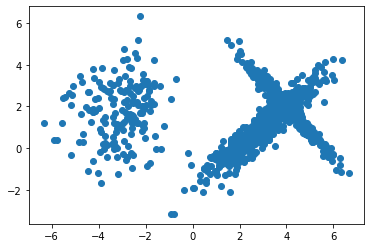

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1000)  # For debugging and reproducibility

N = 1000

pi1=0.15; pi2=0.35; pi3=0.5

mu1=np.array([-3.0, 2.0])
mu2=np.array([4.0, 2.0])
mu3=np.array([3.0, 1.0])

Sigma1 = np.array([
    [1.0,0.2],
    [0.2,2.0],
])
Sigma2 = np.array([
    [0.8,-1.0],
    [-1.0,1.3],
])
Sigma3 = np.array([
    [1.5,1.4],
    [1.4,1.5],
])

Z_seeds = np.random.uniform(0, 1, size=N)
X = np.empty((0,2))
for z_seed in Z_seeds:
    if z_seed < pi1:
        x_n = np.random.multivariate_normal(
            mean=mu1,
            cov=Sigma1,
            size=1)
    elif z_seed < pi1 + pi2:
        x_n = np.random.multivariate_normal(
            mean=mu2,
            cov=Sigma2,
            size=1)
    else:
        x_n = np.random.multivariate_normal(
            mean=mu3,
            cov=Sigma3,
            size=1)
    X = np.vstack((X, x_n))

plt.plot(X[:,0], X[:,1], "o")

## Apply EM algorithm in Python

Now let's implement EM algorithm in Python and estimate parameters $ \mathbf{\theta} = \{ \pi_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k \} (k=0,1,2) $.

### 1. Initialize parameters

First, we initialize $ \mathbf{\theta} = \{ \pi_k, \mathbf{\mu}_k, \mathbf{\Sigma}_k \} (k=0,1,2) $ as follows.

- $ \pi_0 = 0.4, \pi_1 = 0.3, \pi_2 = 0.3 $
- $ \mu_k = (k, k) \;\;\; (k = 0,1,2) $
- $ \Sigma_k = \begin{bmatrix} 1.0 & 0.5 \\ 0.5 & 1.0 \end{bmatrix} \;\;\; (k = 0,1,2) $

In this example, I set the fixed values for $ \mathbf{\mu}_k $ and $ \mathbf{\Sigma}_k $. However, K-means is sometimes used to determine initial $ \mathbf{\mu}_k $ and $ \mathbf{\Sigma}_k $, in order to speed up optimization in practice.

In [2]:
# Initialize parameters
class theta:
    pi = np.empty((0,3))
    mu = np.empty((0,3,2))
    Sigma = np.empty((0,3,2,2))

    def __init__(self, pi, mu, Sigma):
        self.pi = pi
        self.mu = mu
        self.Sigma = Sigma

theta_old = theta(
    pi=np.array([0.4, 0.3, 0.3]),
    mu=np.array([
        [0.0, 0.0],
        [1.0, 1.0],
        [2.0, 2.0]
    ]),
    Sigma=np.array([
        [[1.0, 0.5],[0.5, 1.0]],
        [[1.0, 0.5],[0.5, 1.0]],
        [[1.0, 0.5],[0.5, 1.0]]
    ])
)

### 2. Get responsibility

Next we get the following responsibility, $ \gamma(z_{nk}) $.

$ \gamma_{nk} \equiv \frac{\pi_k \mathcal{N}(\mathbf{x}_n|\mu_k,\Sigma_k)}{\sum_{j=0}^{K-1} \pi_j \mathcal{N}(\mathbf{x}_n|\mu_j,\Sigma_j)} $

In [3]:
from scipy.stats import multivariate_normal

def get_gamma(theta_val):
    gamma = np.empty((0,3))

    for n in range(N):
        gamma_n = np.array([])

        for k in range(3):
            denom_elem = np.array([])
            for j in range(3):
                dist_j = multivariate_normal(
                    mean=theta_val.mu[j],
                    cov=theta_val.Sigma[j])
                denom_elem = np.append(denom_elem, theta_val.pi[j] * dist_j.pdf(X[n]))
            denom = denom_elem.sum()

            dist_k = multivariate_normal(
                mean=theta_val.mu[k],
                cov=theta_val.Sigma[k])
            numer = theta_val.pi[k] * dist_k.pdf(X[n])

            gamma_n = np.append(gamma_n, numer / denom)

        gamma = np.vstack((gamma, gamma_n))

    return gamma

### 2. Get new $\mu$

Next we get new $\mu$ as follows.

$ \mu_k^{new} = \frac{1}{\sum_{n=0}^{N-1} \gamma_{nk}} \sum_{n=0}^{N-1} \left\{ \gamma_{nk} \mathbf{x}_n \right\} $

In [4]:
def get_mu(gamma):
    mu_new = np.zeros((3,2), dtype=np.float64)

    for k in range(3):
        denom = sum(gamma[n][k] for n in range(N))
        numer_x = sum(gamma[n][k] * X[n][0] for n in range(N))
        mu_new[k][0] = numer_x / denom
        numer_y = sum(gamma[n][k] * X[n][1] for n in range(N))
        mu_new[k][1] = numer_y / denom

    return mu_new

### 3. Get new $\Sigma$

Next we get new $\Sigma$ as follows.

$ \Sigma_k^{new} = \frac{1}{\sum_{n=0}^{N-1} \gamma_{nk}} \sum_{n=0}^{N-1} \left\{ \gamma_{nk} (\mathbf{x}_n-\mu_k^{new}) (\mathbf{x}_n-\mu_k^{new})^T \right\} $

In [5]:
def get_sigma(gamma, mu_new):
    Sigma_new = np.empty((0,2,2))

    for k in range(3):
        denom = sum(gamma[n][k] for n in range(N))
        numer = np.zeros((2, 2), dtype=np.float64)
        for n in range(N):
            sub = np.subtract(X[n], mu_new[k])
            sub = np.array([sub])
            sub_t = sub.transpose()
            numer = numer + gamma[n][k] * np.matmul(sub_t, sub)
        Sigma_new = np.vstack((Sigma_new, [numer / denom]))

    return Sigma_new

### 4. Get new $\pi$

Next we get new $\pi$ as follows.

$ \pi_k^{new} = \frac{\sum_{n=0}^{N-1} \gamma_{nk}}{N} $

In [6]:
def get_pi(gamma):
    pi_new = np.array([])

    for k in range(3):
        pi_new = np.append(
            pi_new,
            sum(gamma[n][k] for n in range(N)) / N)

    return pi_new

### 5. Put it all together

Now we put it all together and run algorithm.

In [7]:
for loop in range(50):
    print("Running iteration {} ...".format(loop + 1), end="\r")
    # Get gamma
    l_gamma = get_gamma(theta_old)
    # Get new mu
    l_mu_new = get_mu(l_gamma)
    # Get new sigma
    l_sigma_new = get_sigma(l_gamma, l_mu_new)
    # Get new pi
    l_pi_new = get_pi(l_gamma)
    # Replace theta
    theta_old = theta(
        pi=l_pi_new,
        mu=l_mu_new,
        Sigma=l_sigma_new
    )
print("\nDone")

Running iteration 50 ...
Done


## Compare result

Let's compare the estimated results with actual results.<br>
(In order to simplify the comparison for you, here I have changed the order of components.)

$ \pi_0=0.15, \pi_2=0.5, \pi_1=0.35 $

In [9]:
print(theta_old.pi)

[0.18002701 0.48102331 0.33894968]


$ \mu_0=(-3.0, 2.0), \mu_2=(3.0, 1.0), \mu_1=(4.0, 2.0) $

In [10]:
print(theta_old.mu)

[[-3.09167579  1.78903996]
 [ 2.90769994  0.92164329]
 [ 4.05117296  1.92353166]]


$ \Sigma_0=\begin{bmatrix} 1.0 & 0.2 \\ 0.2 & 2.0 \end{bmatrix} $
$ \Sigma_2=\begin{bmatrix} 1.5 & 1.4 \\ 1.4 & 1.5 \end{bmatrix} $
$ \Sigma_1=\begin{bmatrix} 0.8 & -1.0 \\ -1.0 & 1.3 \end{bmatrix} $

In [11]:
print(theta_old.Sigma)

[[[ 1.15917738  0.18889373]
  [ 0.18889373  1.97087793]]

 [[ 1.56596377  1.4659425 ]
  [ 1.4659425   1.57831011]]

 [[ 0.81293522 -1.00445293]
  [-1.00445293  1.29060795]]]
